## Part 1

------------------------------------------

### PROJECT OBJECTIVE: Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’

#### 1. Import and Warehouse data :
* Import all the given datasets and explore size & shape
* Merge all datasets onto one and explore final shape and size
* Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use
* Import the data from above steps into python

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = r"D:\Gaur\STEPS\EFFORTS\AIML\UNSUPERVISED LEARNING\project"

p11 = pd.read_json(path+"\\Part1 - Car-Attributes.json")
p12 = pd.read_csv(path+"\\Part1 - Car name.csv")


In [3]:
print(" The shape & size of dataset p1 - Car Attributes is", p11.shape,",", p11.size)
print("--"*50)

print(" The shape & size of dataset p2 - Company is", p12.shape,"," ,p12.size)
print("--"*50)


 The shape & size of dataset p1 - Car Attributes is (398, 8) , 3184
----------------------------------------------------------------------------------------------------
 The shape & size of dataset p2 - Company is (398, 1) , 398
----------------------------------------------------------------------------------------------------


In [4]:
for i in [p11, p12] :
    display(i.head(3))
    print("--"*50)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1


----------------------------------------------------------------------------------------------------


,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite


----------------------------------------------------------------------------------------------------


In [5]:
df_car = pd.concat([p11, p12] , axis = 1)

#### Exploratory Data Analysis


In [6]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
char_col = df_car.loc[: , df_car.dtypes == 'object'].columns.tolist()
num_col = df_car.describe().columns.tolist()

In [8]:
df_car.nunique()

mpg         129
cyl           5
disp         82
hp           94
wt          351
acc          95
yr           13
origin        3
car_name    305
dtype: int64

In [9]:
df_car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
df_car.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [11]:
print(char_col, num_col)

['hp', 'car_name'] ['mpg', 'cyl', 'disp', 'wt', 'acc', 'yr', 'origin']


In [12]:
df_car['origin'] = df_car['origin'].astype('str')
df_car['yr'] = df_car['yr'].astype('str')

In [13]:
print("char column before :", char_col)
print("numerical columns before :", num_col)
print("--"*50)

char_col = df_car.loc[: , df_car.dtypes == 'object'].columns.tolist()
num_col = df_car.describe().columns.tolist()
print("char column after :", char_col)
print("numerical columns after :", num_col)

char column before : ['hp', 'car_name']
numerical columns before : ['mpg', 'cyl', 'disp', 'wt', 'acc', 'yr', 'origin']
----------------------------------------------------------------------------------------------------
char column after : ['hp', 'yr', 'origin', 'car_name']
numerical columns after : ['mpg', 'cyl', 'disp', 'wt', 'acc']


#### 2. Data Cleaning

In [14]:
for i in char_col:
    t = df_car[ df_car[i].astype(str).str.isdigit() == False ].shape[0]
    print("Non numeric values in column", i, t)


Non numeric values in column hp 6
Non numeric values in column yr 0
Non numeric values in column origin 0
Non numeric values in column car_name 398


In [15]:
df_car["hp"]= df_car["hp"].replace({"?":np.nan})

In [22]:
df_car['hp'] = pd.to_numeric(df_car['hp'])

In [23]:
df_car.isna().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [27]:
df_car['hp'] = df_car['hp'].fillna(df_car['hp'].median())

In [28]:
print("char column before :", char_col)
print("numerical columns before :", num_col)
print("--"*50)

char_col = df_car.loc[: , df_car.dtypes == 'object'].columns.tolist()
num_col = df_car.describe().columns.tolist()
print("char column after :", char_col)
print("numerical columns after :", num_col)

char column before : ['hp', 'yr', 'origin', 'car_name']
numerical columns before : ['mpg', 'cyl', 'disp', 'wt', 'acc']
----------------------------------------------------------------------------------------------------
char column after : ['yr', 'origin', 'car_name']
numerical columns after : ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc']


#### 3. Data analysis & Visualization

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

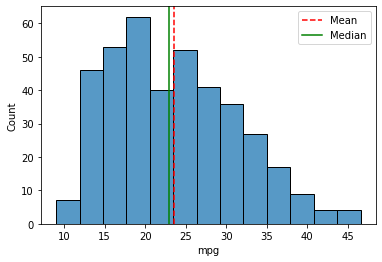

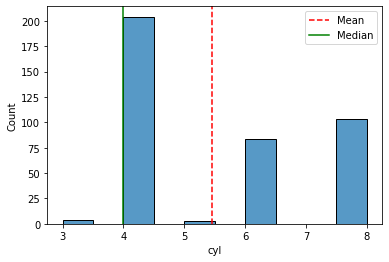

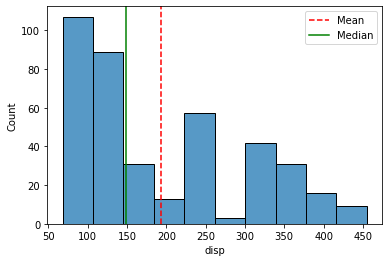

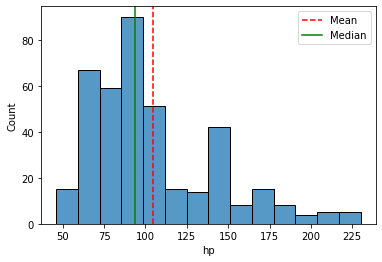

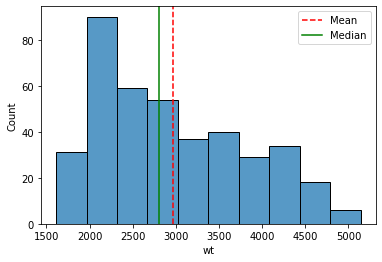

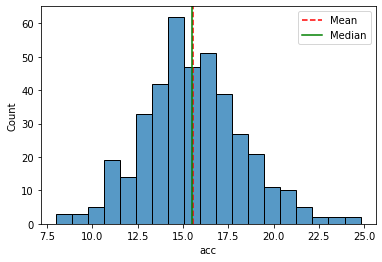

In [30]:
for i in df_car.describe().columns.tolist():
    
    sns.histplot(df_car[i])
    plt.axvline(df_car[i].mean(),   color='r', linestyle= '--')
    plt.axvline(df_car[i].median(), color='g', linestyle="-")
    
    plt.legend({'Mean':df_car[i].mean(), 'Median':df_car[i].median()})
    plt.show();

In [32]:
print(char_col, num_col )

['yr', 'origin', 'car_name'] ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc']


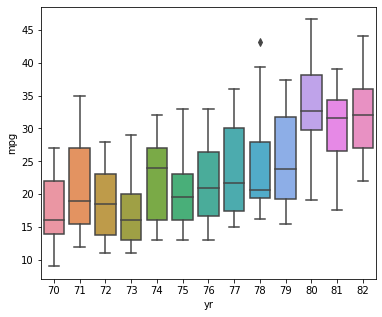

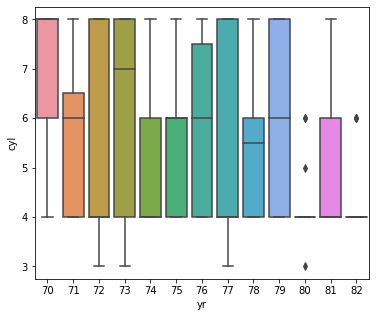

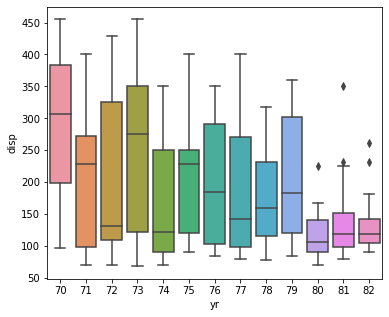

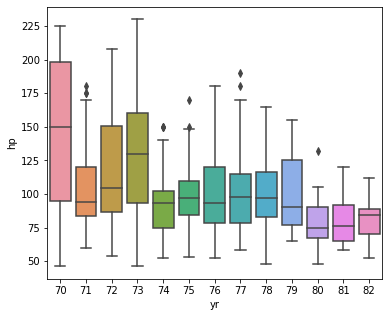

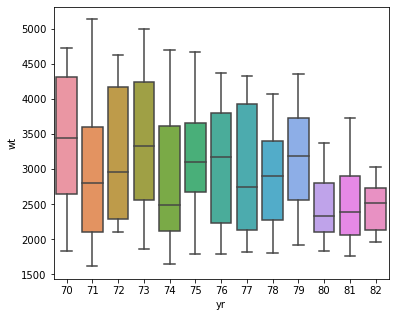

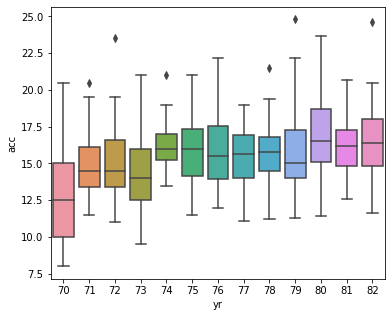

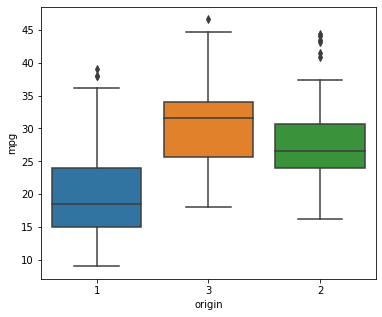

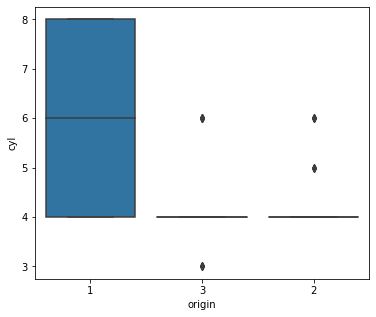

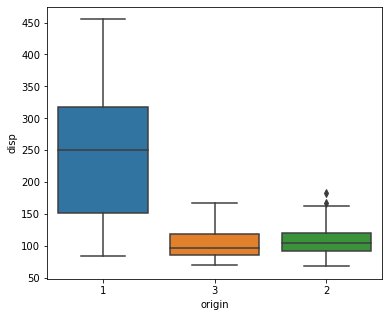

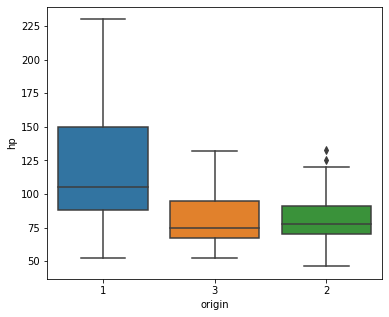

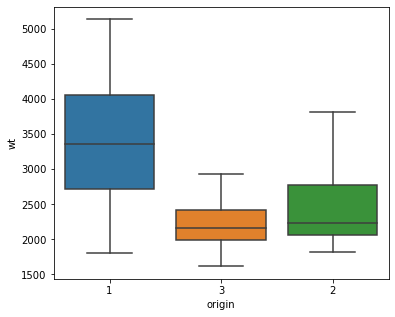

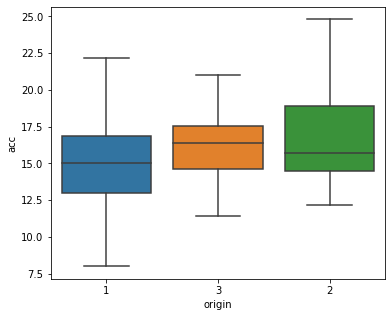

In [35]:
for i in char_col[:-1] : 
    for j in num_col :
        
        plt.figure(figsize=(6,5))
        sns.boxplot(x = df_car[i] , y = df_car[j],  data = df_car )
        plt.show();

In [36]:
df_car.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8


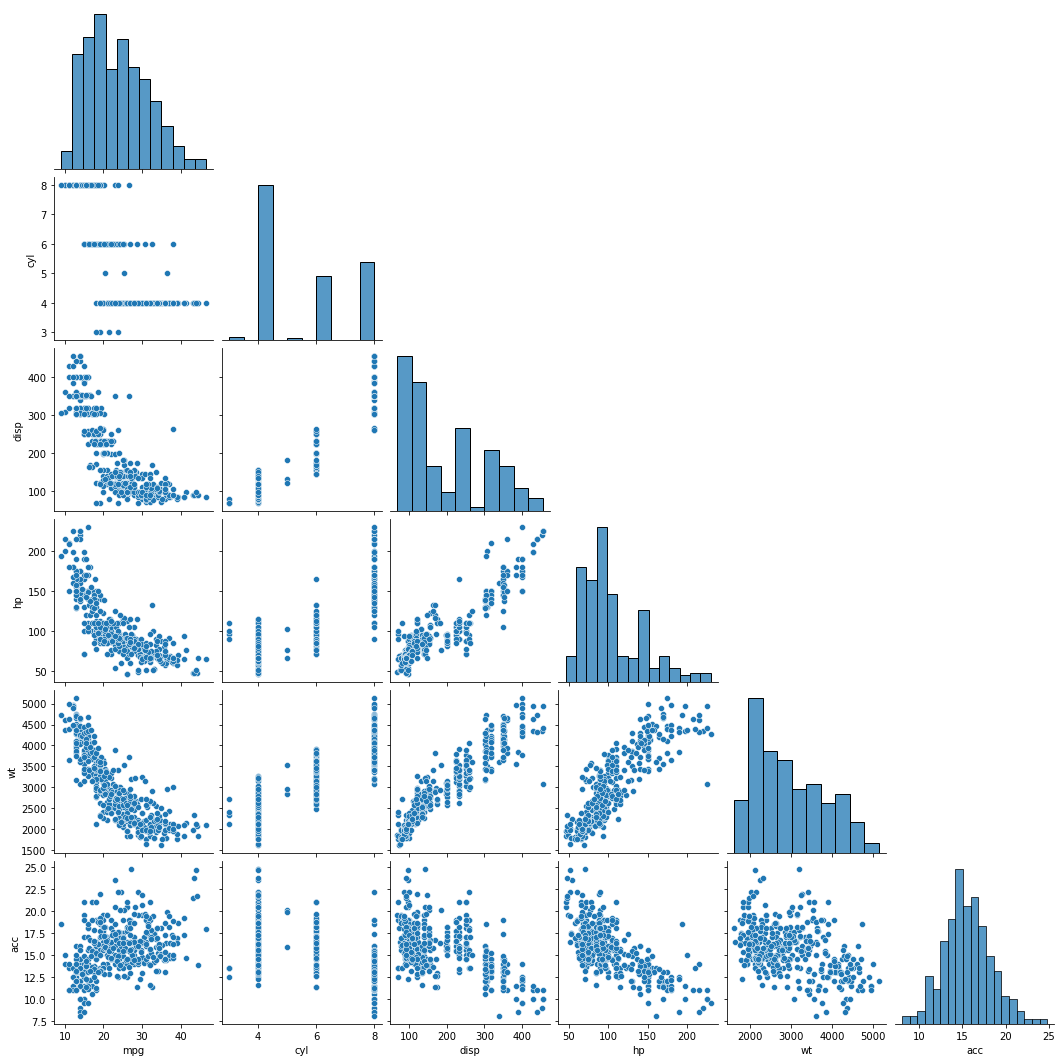

In [39]:
sns.pairplot(df_car , corner = True);

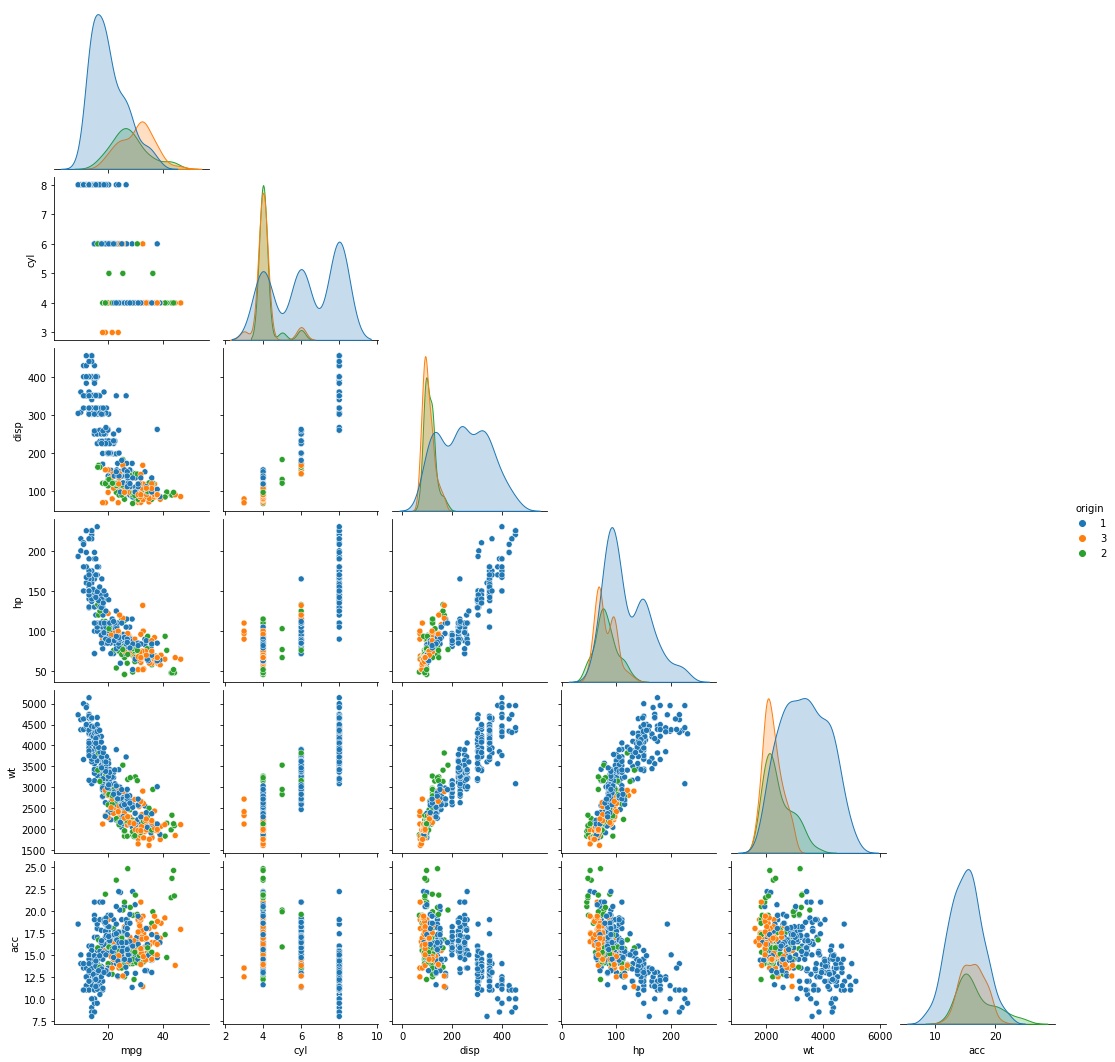

In [41]:
sns.pairplot(df_car, hue = 'origin', corner = True);

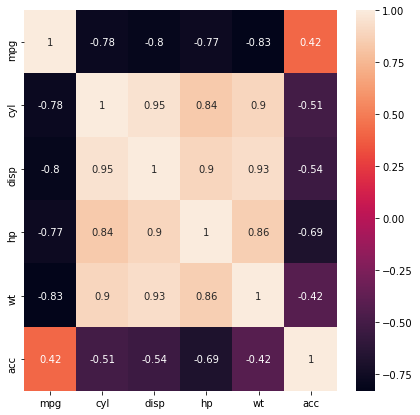

In [44]:
plt.figure(figsize=(7,7))
sns.heatmap(df_car.corr(),annot=True);

#### 4. Machine Learning

In [48]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

In [51]:
df_car

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [52]:
scaler = StandardScaler()
encoder=LabelEncoder()
# Scale and Encode Separate Columns

df_car[["yr","origin"]]=df_car[["yr","origin"]].apply(lambda x: encoder.fit_transform(x))
df_car[["cyl","mpg","wt","acc","hp"]]=scaler.fit_transform(df_car[["cyl","mpg","wt","acc","hp"]])

In [55]:
df_car2 = df_car.drop( columns = ['car_name'])

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


Text(0.5, 1.0, 'Selecting k with the elbow Method')

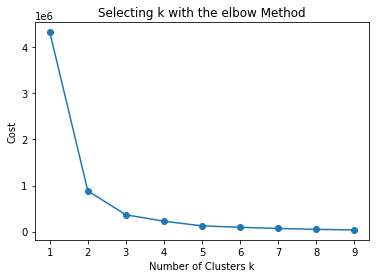

In [56]:
inertias=[]
for cluster in range(1,10):
    kmeans= KMeans(n_clusters=cluster,init='k-means++', n_init=10, random_state=1)
    cluster_labels=kmeans.fit_predict(df_car2)
    inertias.append(kmeans.inertia_)
    print('Cluster initiation: {}'.format(cluster))

# Converting the results into a dataframe and plotting them
df_clusters = pd.DataFrame({'Cluster':range(1, 10), 'Inertia':inertias}) 
plt.plot
plt.plot(df_clusters["Cluster"],df_clusters["Inertia"],marker="o")
plt.xlabel("Number of Clusters k")
plt.ylabel("Cost")
plt.title("Selecting k with the elbow Method")

In [65]:
#selecting k =3 and fitting the model
from sklearn.metrics import silhouette_score

kmeans_3= KMeans(n_clusters=3,init='k-means++', n_init=10, random_state=1)
labels_3= kmeans_3.fit_predict(df_car2)

score = silhouette_score(df_car2, kmeans_3.labels_, metric='euclidean')
print("silhouette score for three Clusters",score)

silhouette score for three Clusters 0.6870370479310102


In [66]:
#selecting k =4 and fitting the model
from sklearn.metrics import silhouette_score

kmeans_4= KMeans(n_clusters=4,init='k-means++', n_init=10, random_state=1)
labels_4= kmeans_4.fit_predict(df_car2)

score = silhouette_score(df_car2, kmeans_4.labels_, metric='euclidean')
print("silhouette score for four Clusters",score)

silhouette score for four Clusters 0.6992053329528041


Number of Clusters will be 3, bcz there is no significant increase in silhoutte value. So better go for a simple model than complex

In [72]:
df_car2['labels'] = labels_3

In [74]:
cluster1 = df_car2[df_car2["labels"]==0]
cluster2 = df_car2[df_car2["labels"]==1]
cluster3 = df_car2[df_car2["labels"]==2]

for i in [cluster1 , cluster2, cluster3] :
    print(i.shape)
    print("--"*50)
    

(79, 9)
----------------------------------------------------------------------------------------------------
(221, 9)
----------------------------------------------------------------------------------------------------
(98, 9)
----------------------------------------------------------------------------------------------------


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [83]:
for i in [cluster1, cluster2, cluster3] :
    
    
    xtrain, xtest, ytrain, ytest = train_test_split( i.drop(['mpg','labels'], axis =1 ) , i['mpg'], test_size = 0.3, random_state = 23)
    reg1 = LinearRegression()
    reg1.fit(xtrain, ytrain)
    ypred = reg1.predict(xtest)
    
    print('Train score: {}\n'.format(reg1.score(xtrain,ytrain)))
    print('Test score: {}\n'.format(reg1.score(xtest,ytest)))
    print('Overall model accuracy: {}\n'.format(r2_score(ytest,ypred)))
    print('Mean Squared Error: {}'.format(mean_squared_error(ytest,ypred)))
    print('--'*50)


Train score: 0.521611922899698

Test score: -0.550463582328238

Overall model accuracy: -0.550463582328238

Mean Squared Error: 0.07375956499714144
----------------------------------------------------------------------------------------------------
Train score: 0.7166252111468394

Test score: 0.6811650967852811

Overall model accuracy: 0.6811650967852811

Mean Squared Error: 0.17354144040916133
----------------------------------------------------------------------------------------------------
Train score: 0.5770692410986998

Test score: 0.29751652906956594

Overall model accuracy: 0.29751652906956594

Mean Squared Error: 0.1327259032947141
----------------------------------------------------------------------------------------------------


#### Regression on Whole dataset

In [84]:
X=df_car2.drop(["mpg",'labels'],axis=1)
y=df_car["mpg"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

In [85]:
model_reg= LinearRegression()
model_reg.fit(X_train,y_train)
y_pred = model_reg.predict(X_test)  # make prediction with the fitted model

# score the model on the train set
print('Train score: {}\n'.format(model_reg.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model_reg.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('r2 score: {}\n'.format(r2_score(y_test,y_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))

Train score: 0.8102052299899135

Test score: 0.8641210527455934

r2 score: 0.8641210527455934

Mean Squared Error: 0.1256327549083822


Make sense to build one model, instead of many

## Part 2

------------------------------------------

### PROJECT OBJECTIVE: Goal is to build a synthetic data generation model using the existing data provided by the company

In [111]:
import pandas as pd
import numpy as np


In [112]:
data=pd.read_excel(path+"\\Part2 - Company.xlsx")

In [113]:
data.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [114]:
data.tail()

,A,B,C,D,Quality
56,200,186,185,179,Quality B
57,137,182,165,199,NaN
58,88,39,9,102,NaN
59,180,157,192,198,NaN
60,157,135,135,156,NaN


In [115]:
data.isna().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [116]:
data.shape

(61, 5)

In [98]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [117]:
data["Quality"]=data["Quality"].map({"Quality A":0,"Quality B":1})

In [120]:
scaler=MinMaxScaler()
data.iloc[:,0:-1]=scaler.fit_transform(data.iloc[:,0:-1])
imputer=KNNImputer(n_neighbors=5)
cols=data.columns

In [122]:
df_imputed = pd.DataFrame(imputer.fit_transform(data),columns=cols)

In [123]:
df_imputed.iloc[:,0:-1]=scaler.inverse_transform(df_imputed.iloc[:,0:-1])

In [124]:
df_imputed["Quality"]=df_imputed["Quality"].map({0:"Quality A",1:"Quality B"})
data["Quality"]=data["Quality"].map({0:"Quality A",1:"Quality B"}) 

In [126]:
df_imputed.isna().sum()

A          0
B          0
C          0
D          0
Quality    0
dtype: int64

## Part 3

------------------------------------------

### PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.

In [127]:
import pandas as pd
import numpy as np

In [128]:
data = pd.read_csv(path+"\\Part3 - vehicle.csv")

In [129]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [130]:
data.shape

(846, 19)

#### Exploratory Data Analysis

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [133]:
data.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [136]:
data = data.fillna(data.median())

In [137]:
data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

#### Univariate Analysis

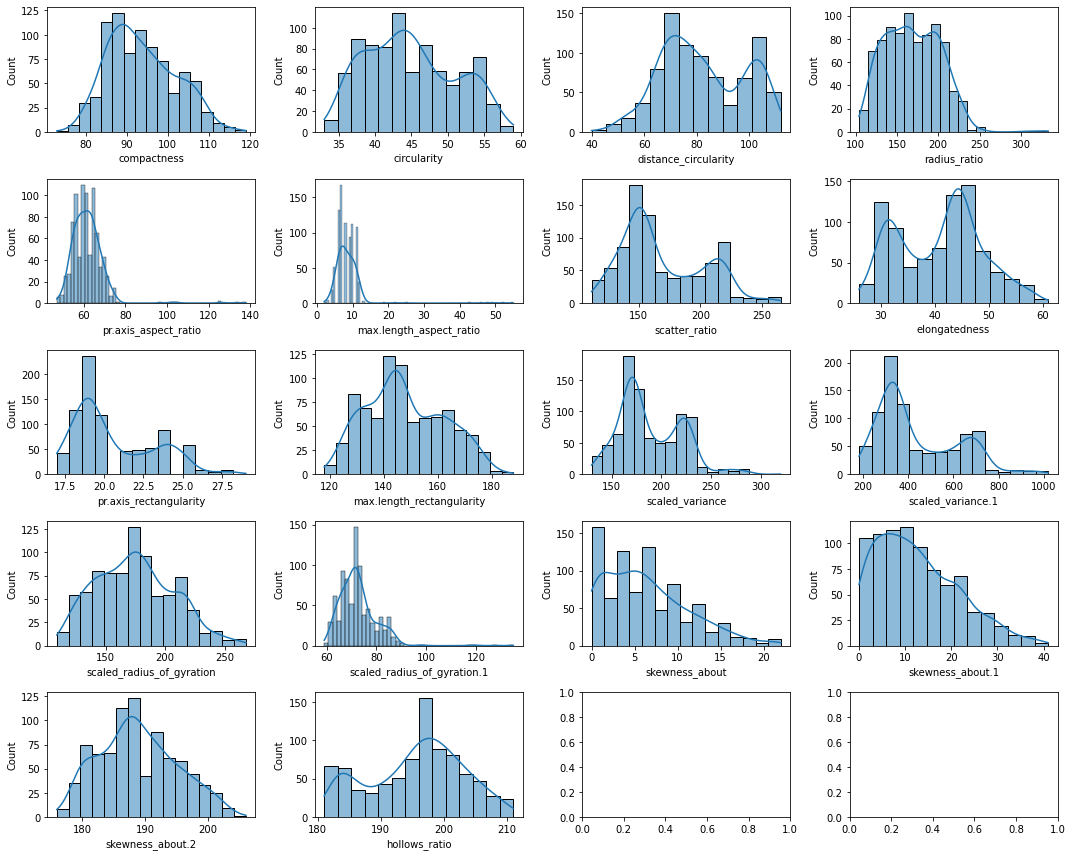

In [138]:
plt.subplots(5,4,figsize=(15,12))
for i ,col in enumerate(data.drop("class",axis=1).columns):
    i+=1
    plt.subplot(5,4,i)
    sns.histplot(x=data[col],kde=True)
    plt.tight_layout()

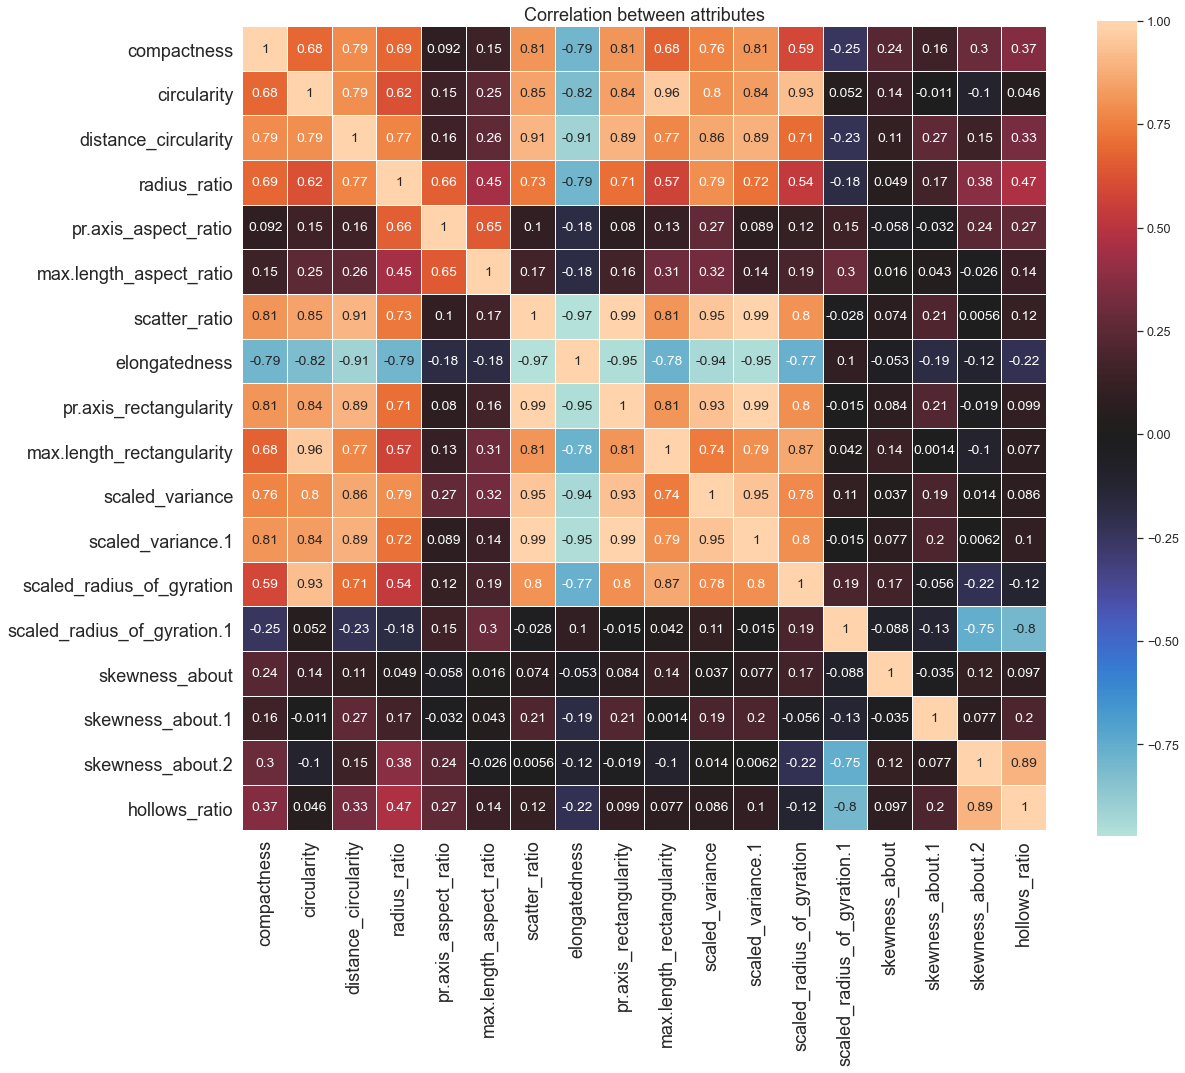

In [139]:
# correlation plot---heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(), annot=True,linewidths=0.01,center=0,linecolor="white",square=True)
plt.title('Correlation between attributes',fontsize=18)
plt.tick_params(labelsize=18)

#### Data Pre-processing

In [141]:
X=data.drop("class",axis=1)
y=data["class"]

In [142]:
from scipy.stats import zscore
XScaled=X.apply(zscore)

In [143]:
XScaled.shape

(846, 18)

In [144]:
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold

In [145]:
X_train,X_test,y_train,y_test=train_test_split(XScaled,y,test_size=0.3,stratify=y,random_state=1)

### linear kernel

In [152]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [147]:
from sklearn import svm

In [148]:
import timeit
start = timeit.default_timer()
#using linear kernel
svm_clf_linear= svm.SVC(kernel="linear",class_weight="balanced")

In [149]:
svm_clf_linear.fit(X_train,y_train)
stop = timeit.default_timer()
print("Total time taken\n",str(stop - start) +" " + "Seconds")

Total time taken
 28.9213036000001 Seconds


In [150]:
y_pred=svm_clf_linear.predict(X_test)

In [153]:
print("training accuracy",svm_clf_linear.score(X_train,y_train))
print("test accuracy",svm_clf_linear.score(X_test,y_test))
print("Classification report",classification_report(y_test,y_pred))


training accuracy 0.9594594594594594
test accuracy 0.937007874015748
Classification report               precision    recall  f1-score   support

         bus       0.90      0.95      0.93        65
         car       0.98      0.91      0.95       129
         van       0.89      0.97      0.93        60

    accuracy                           0.94       254
   macro avg       0.92      0.95      0.93       254
weighted avg       0.94      0.94      0.94       254



#### RBF Kernel

In [154]:
svm_clf_rbf= svm.SVC(kernel="rbf",class_weight="balanced")

In [155]:
svm_clf_rbf.fit(X_train,y_train)
y_pred1=svm_clf_rbf.predict(X_test)

In [156]:
print("training accuracy",svm_clf_rbf.score(X_train,y_train).round(3))
print("test accuracy",svm_clf_rbf.score(X_test,y_test).round(3))
print("=========Classification report========")
print(classification_report(y_test,y_pred1))

training accuracy 0.961
test accuracy 0.953
=========Classification report========
              precision    recall  f1-score   support

         bus       0.98      0.97      0.98        65
         car       1.00      0.92      0.96       129
         van       0.85      1.00      0.92        60

    accuracy                           0.95       254
   macro avg       0.94      0.96      0.95       254
weighted avg       0.96      0.95      0.95       254



Rbf is slightly better than linear

#### Sports Management

In [157]:
data = pd.read_csv(path+"\\Part4 - batting_bowling_ipl_bat.csv")

In [158]:
data.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
data.tail()

,Name,Runs,Ave,SR,Fours,Sixes,HF
175,PC Valthaty,30.0,5.0,58.82,4.0,0.0,0.0
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,RP Singh,6.0,3.0,50.00,0.0,0.0,0.0
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,R Sharma,2.0,0.5,18.18,0.0,0.0,0.0


In [160]:
data.dropna( inplace = True)

In [161]:
data.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


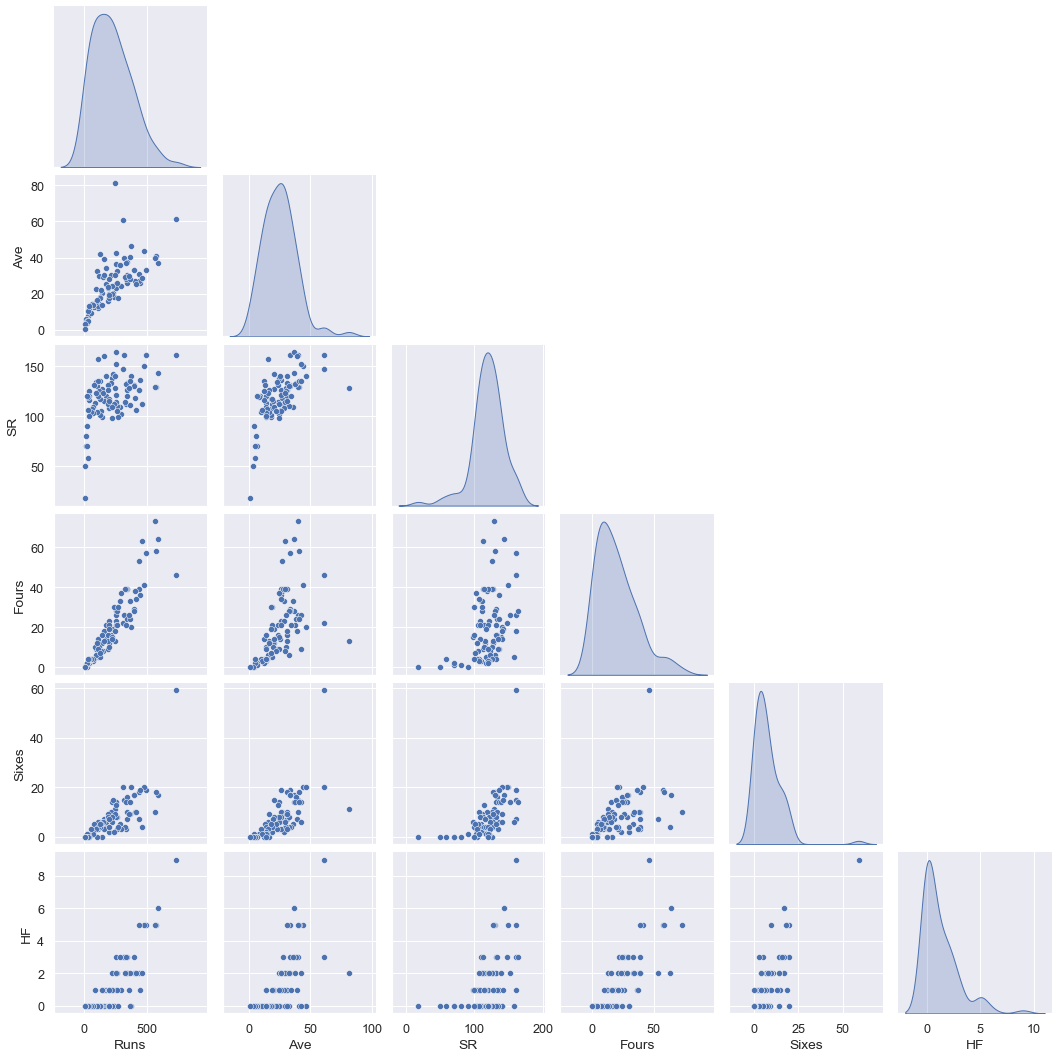

In [162]:
sns.pairplot(data,diag_kind="kde", corner = True)

In [164]:
from scipy.stats import zscore

In [167]:
data.set_index('Name', inplace = True)
data = data.apply(zscore)

In [168]:
data.head()

,Runs,Ave,SR,Fours,Sixes,HF
Name,,,,,,
CH Gayle,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
G Gambhir,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
V Sehwag,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
CL White,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
S Dhawan,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


In [170]:
from sklearn.decomposition import PCA

In [173]:
pca=PCA(n_components= data.shape[1])
pca.fit(data)

PCA(n_components=6)

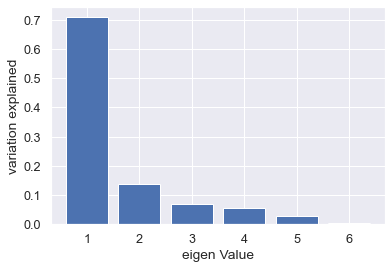

In [174]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,align="center")
plt.ylabel("variation explained")
plt.xlabel("eigen Value")
plt.show()

In [175]:
cum_var_exp=np.cumsum(pca.explained_variance_ratio_)
cum_var_exp

array([0.70911996, 0.84696562, 0.91563695, 0.96988153, 0.99718777,
       1.        ])

We can go ahead with 3 components as it explains >90%

In [176]:
pca = PCA(n_components = 3)

In [177]:
pca.fit(data)

PCA(n_components=3)

In [178]:
pca_data = pca.transform(data)

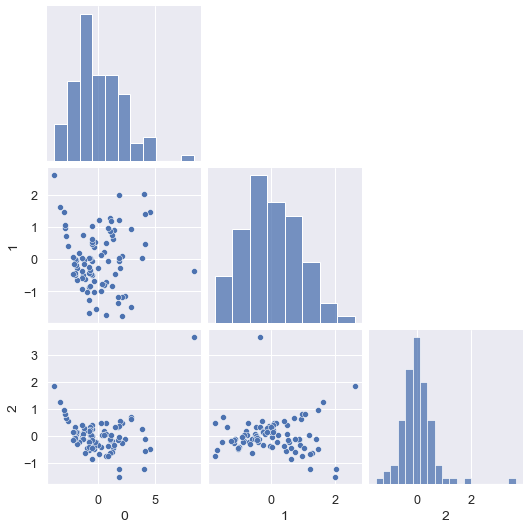

In [179]:
sns.pairplot( pd.DataFrame(pca_data), corner = True)

In [181]:
data['player_ratings'] = np.dot(pca_data,pca.explained_variance_)

In [183]:
data.head()

,Runs,Ave,SR,Fours,Sixes,HF,player_ratings
Name,,,,,,,
CH Gayle,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551,37.877248
G Gambhir,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038,20.895771
V Sehwag,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533,17.984271
CL White,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533,16.921513
S Dhawan,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533,18.849865


In [186]:
data.sort_values("player_ratings",ascending=False, inplace = True)
data["Rank"] = data["player_ratings"].rank(ascending=False) 

In [188]:
data.head(10)

,Runs,Ave,SR,Fours,Sixes,HF,player_ratings,Rank
Name,,,,,,,,
CH Gayle,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551,37.877248,1.0
G Gambhir,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038,20.895771,2.0
S Dhawan,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533,18.849865,3.0
AM Rahane,2.188568,1.127500,0.432136,3.262788,0.304422,2.269533,18.489919,4.0
V Sehwag,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533,17.984271,5.0
CL White,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533,16.921513,6.0
RG Sharma,1.371234,0.457059,0.316088,1.177983,1.309851,2.269533,13.608341,7.0
KP Pietersen,0.547464,2.678077,1.197712,0.135580,1.561209,1.078525,11.427759,8.0
F du Plessis,1.145984,0.622454,0.499724,0.564805,1.184173,1.078525,9.422388,9.0
